In [28]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random as ran
from clustering import som
from tensorflow.examples.tutorials.mnist import input_data

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


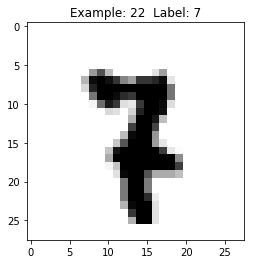

In [30]:
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

def train_size(num):
    x_train = mnist.train.images[:num,:]
    y_train = mnist.train.labels[:num,:]
    return x_train, y_train

x_train, y_train = train_size(100)
x_test, y_test = train_size(110)
x_test = x_test[100:110,:]; y_test = y_test[100:110,:]

def display_digit(num):
    label = y_train[num].argmax(axis=0)
    image = x_train[num].reshape([28,28])
    plt.title('Example: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

display_digit(ran.randint(0, x_train.shape[0]))

In [31]:
# train model
model = som.SOM(30, 30, x_train.shape[1], 200)
model.train(x_train)

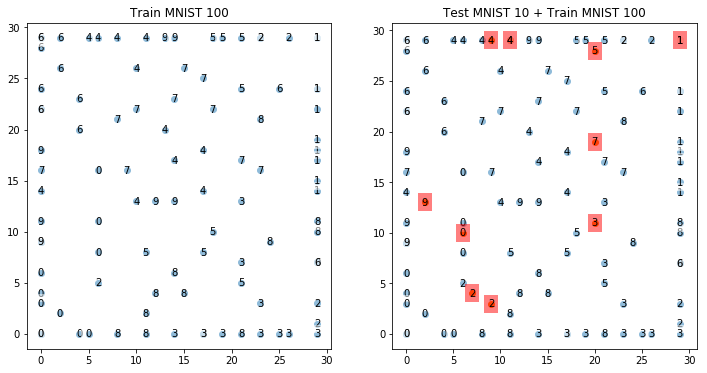

In [32]:
# Fit train data into SOM lattice
mapped = model.map_vects(x_train)
mappedarr = np.array(mapped)
x1 = mappedarr[:, 0]
y1 = mappedarr[:, 1]

index = [ np.where(r==1)[0][0] for r in y_train ]
index = list(map(str, index))

## Plots: 1) Train 2) Test+Train ###

plt.figure(1, figsize=(12,6))
plt.subplot(121)
# Plot 1 for Training only
plt.scatter(x1, y1)
# adding text
for i, m in enumerate(mapped):
    plt.text( m[0], m[1], index[i], ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5, lw=0))
plt.title('Train MNIST 100')

# Testing
mappedtest = model.map_vects(x_test)
mappedtestarr = np.array(mappedtest)
x2 = mappedtestarr[:, 0]
y2 = mappedtestarr[:, 1]

index2 = [ np.where(r==1)[0][0] for r in y_test ]
index2 = list(map(str, index2))

plt.subplot(122)
# Plot 2: Training + Testing
plt.scatter(x1, y1)
# adding text
for i, m in enumerate(mapped):
    plt.text( m[0], m[1], index[i], ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5, lw=0))

plt.scatter(x2, y2)
# adding text
for i, m in enumerate(mappedtest):
    plt.text( m[0], m[1], index2[i], ha='center', va='center', bbox=dict(facecolor='red', alpha=0.5, lw=0))
plt.title('Test MNIST 10 + Train MNIST 100')

plt.show()